In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from scikitplot.estimators import plot_feature_importances

In [2]:
df = pd.read_csv("cleaned_churn_data.csv")

df.tail(15)

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_MonthlyCharges_ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
7028,68,1,64.10,4326.25,0,67.492200,1,0,1,0,1,0,1
7029,6,0,44.40,263.05,0,5.924550,0,0,0,0,0,0,0
7030,2,1,20.05,39.25,0,1.957606,0,0,1,1,0,0,0
7031,55,1,60.00,3316.10,0,55.268333,0,1,1,0,1,1,0
7032,1,1,75.75,75.75,1,1.000000,0,0,0,0,0,0,0
7033,38,1,69.50,2625.25,0,37.773381,0,1,1,0,0,0,0
7034,67,1,102.95,6886.25,1,66.889267,0,1,1,0,0,0,0
7035,19,1,78.70,1495.10,0,18.997459,1,0,1,0,0,0,0
7036,12,0,60.65,743.30,0,12.255565,0,0,0,0,1,1,0
7037,72,1,21.15,1419.40,0,67.111111,1,0,1,0,1,0,1


## Split data into features and targets

In [3]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## Split into training and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Check for infiniy values error in the dataset

In [5]:
print("Infinity values in X_train:", np.any(np.isinf(X_train)))
print("NaN values in X_train:", np.any(np.isnan(X_train)))

Infinity values in X_train: False
NaN values in X_train: False


## Decision tree

In [6]:


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

print("Decision Tree:")
print("Training accuracy:", dt_model.score(X_train, y_train))
print("Testing accuracy:", dt_model.score(X_test, y_test))

Decision Tree:
Training accuracy: 0.9943201987930422
Testing accuracy: 0.7210787792760823


The significant difference between the training accuracy (0.9943) and testing accuracy (0.7232) suggests that the decision tree model (dt_model) may be overfitting the training data. 

## Bayesian search for DT HPP tuning

In [7]:
param_grid = {'max_depth': [2, 3, 5, 7, 10]} 
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 7, 10]})

In [8]:
best_max_depth = grid_search.best_params_['max_depth']

print(best_max_depth)

3


We found the best max_depth as 3

In [9]:

dt_tuned = DecisionTreeClassifier(max_depth=best_max_depth)
dt_tuned.fit(X_train, y_train)

print("Tuned Decision Tree:")
print("Training accuracy:", dt_tuned.score(X_train, y_train))
print("Testing accuracy:", dt_tuned.score(X_test, y_test))

Tuned Decision Tree:
Training accuracy: 0.7864749733759319
Testing accuracy: 0.78708303761533


The smaller difference between the training and testing accuracies indicates that the model is now better at generalizing to new, unseen data. This suggests that the regularization imposed by setting the maximum depth to 3 has helped in reducing overfitting.

In [10]:
dt_tuned.get_depth()

3

## Visualize tuned decision tree

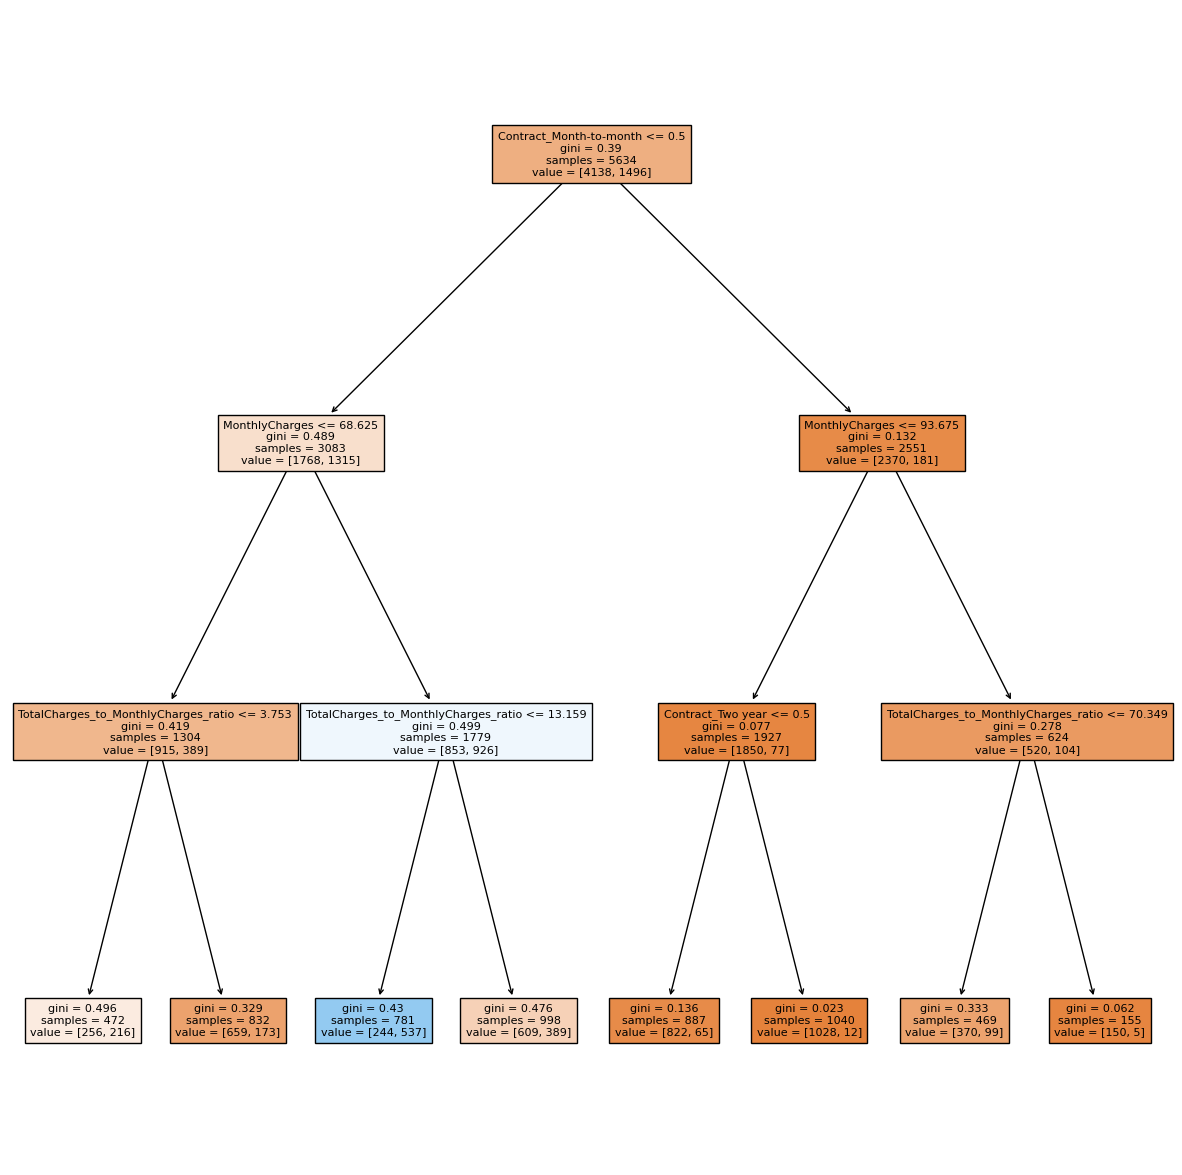

In [11]:
plt.figure(figsize=(15, 15))
_ = plot_tree(dt_tuned, fontsize=8, feature_names=X.columns, filled=True)
plt.show()

The color gradient represents,

**Impurity (Gini impurity or entropy)** 

Nodes with higher impurity are represented by warmer colors such as orange, while nodes with lower impurity are represented by cooler colors (blue). This helps visualize how well the tree is able to split the data based on the features.


## Random Forest

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Display model metrics

In [13]:

print("Random Forest:")
print("Training accuracy:", rf_model.score(X_train, y_train))
print("Testing accuracy:", rf_model.score(X_test, y_test))

Random Forest:
Training accuracy: 0.9941427050053249
Testing accuracy: 0.7842441447835344


Clearly there's overfitting due to the large differences between the training and testing accuracies

## Hyperparameter tuning

In [14]:
param_grid = {'max_depth': [2, 5, 10]}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 10]})

In [15]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 5}


In [16]:
rf_best = RandomForestClassifier(random_state=42, **best_params)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [17]:
print("Tuned Random Forest:")
print("Training accuracy:", rf_best.score(X_train, y_train))
print("Testing accuracy:", rf_best.score(X_test, y_test))

Tuned Random Forest:
Training accuracy: 0.7994320198793042
Testing accuracy: 0.794180269694819


Now the overfitting hazard has been dealt with

## Feature selection

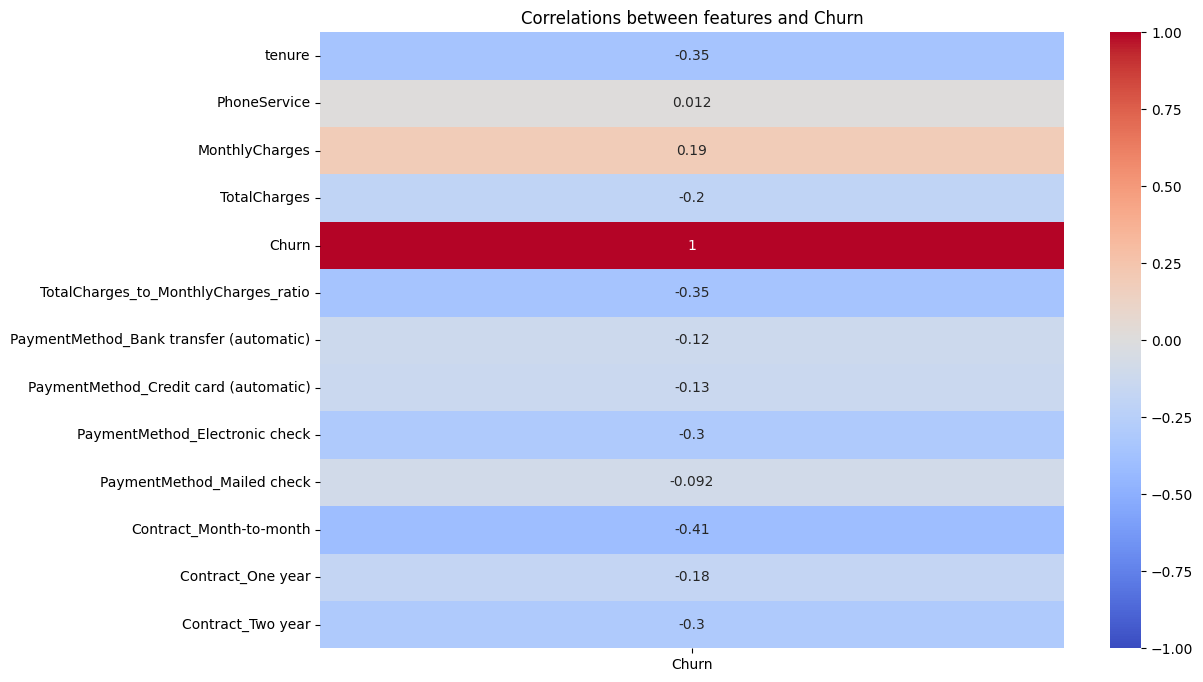

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['Churn']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlations between features and Churn")
plt.show()

## Featured importances fro Tuned RF

<Figure size 1000x600 with 0 Axes>

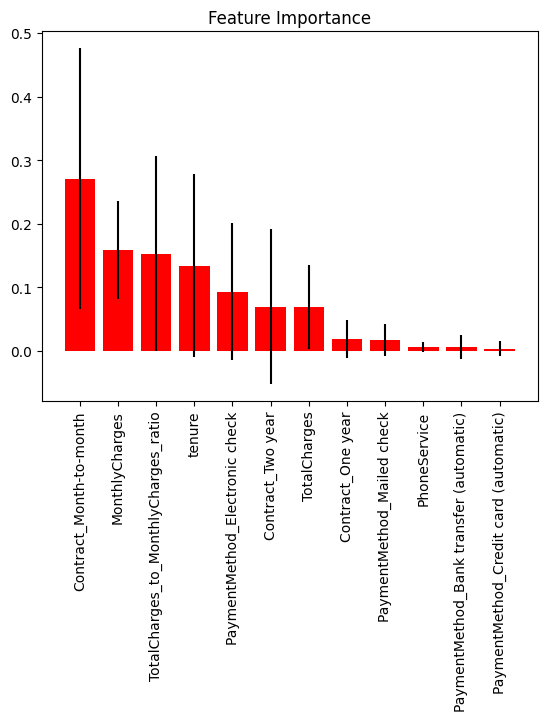

In [19]:
plt.figure(figsize=(10, 6))
plot_feature_importances(rf_best, feature_names=X.columns, x_tick_rotation=90)
plt.show()


In [20]:
less_important_features = ['PaymentMethod_Electronic check', 'TotalCharges', 'Contract_Two year', 'Contract_One year', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'PhoneService']

X_train_filtered = X_train.drop(less_important_features, axis=1)
X_test_filtered = X_test.drop(less_important_features, axis=1)

## Fit and Visualize RFC

In [22]:
rf_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_filtered.fit(X_train_filtered, y_train)

RandomForestClassifier(random_state=42)

<Figure size 1000x600 with 0 Axes>

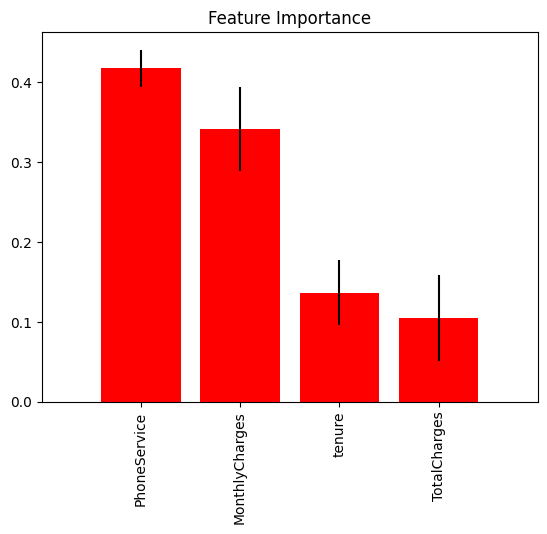

In [23]:
plt.figure(figsize=(10, 6))
plot_feature_importances(rf_filtered, feature_names=X.columns, x_tick_rotation=90)
plt.show()

In [27]:
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

print("Random Forest with remaining selected features:")
evaluate_model(rf_filtered, X_test_filtered, y_test)

Random Forest with remaining selected features:
Accuracy: 0.7587, Precision: 0.5541, Recall: 0.4531, F1 Score: 0.4985


A modest reduction in accuracy after removal of the less important features

## Summary

**Data Loading and Splitting**

Loaded the churn prediction dataset.
Created feature (X) and target (y) variables.
Split the data into training and testing sets.

**Decision Tree**

Built a baseline decision tree without hyperparameter tuning.
Evaluated the decision tree on training and testing data.
Utilized GridSearchCV for hyperparameter tuning, specifically adjusting the max_depth parameter.
Created a tuned decision tree based on the best hyperparameters.
Visualized the tuned decision tree.

**Random Forest**

Built a baseline random forest without hyperparameter tuning.
Utilized BGridSearchCV for hyperparameter tuning, focusing on the max_depth parameter.
Created a tuned random forest (rf_tuned) based on the best hyperparameters.

**Feature Selection**

Explored feature correlations using a heatmap.
Plotted feature importances for the tuned random forest.

**Further Feature Selection and Model Evaluation**

Identified and dropped less important features.
Trained a random forest model (rf_filtered) on the filtered feature set.
Visualized feature importances after removing less important features.
Evaluated the random forest model after feature selection using metrics such as accuracy, precision, recall, and F1 score.